###EDA And Feature Engineering Flight Price Prediction


INTRODUCTION
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

Research Questions
The aim of our study is to answer the below research questions:
a) Does price vary with Airlines?
b) How is the price affected when tickets are bought in just 1 or 2 days before departure?
c) Does ticket price change based on the departure time and arrival time?
d) How the price changes with change in Source and Destination?
e) How does the ticket price vary between Economy and Business class?

check the dataset info below https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

FEATURES

The various features of the cleaned dataset are explained below:

1. Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2. Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3. Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4. Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5. Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6. Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels information about the arrival time.

7. Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8. Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9 Duration & continuous feature that dienlave the overall amount of time it takes to travel hetween cities in hours

10 Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11 Price: Target variable stores information of the ticket price.


In [ ]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Flight Price Prediction Dataset.csv')

In [ ]:
df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.shape

(300153, 11)

In [ ]:
## Get the basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df1 = df.groupby(['flight','airline'], as_index=False).count()
df1.airline.value_counts()

,count
airline,
Indigo,704
Air_India,218
GO_FIRST,205
SpiceJet,186
Vistara,133
AirAsia,115


 Indigo has more flights than other airlines

<ipython-input-59-355ffac5dcb5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline', data=df1, palette='hls')  # Changed to horizontal


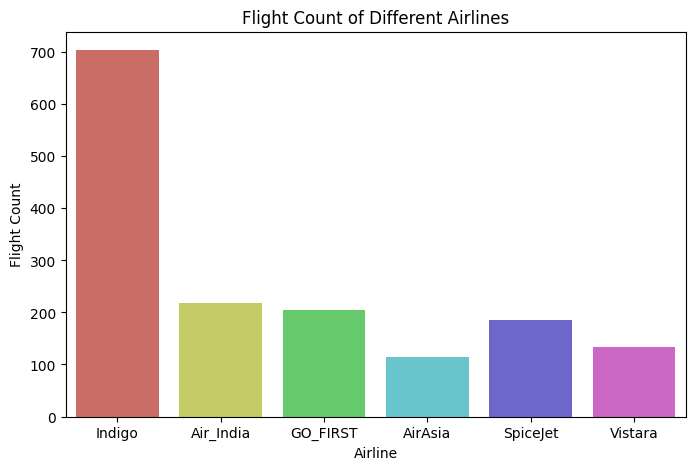

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='airline', data=df1, palette='hls')  # Changed to horizontal
plt.title("Flight Count of Different Airlines")
plt.xlabel("Airline")
plt.ylabel("Flight Count")
plt.show()

In [ ]:
df2= df.groupby(['flight','airline','class'], as_index=False).count()
df2['class'].value_counts()

,count
class,
Economy,1560
Business,295


Most of the Airline has Economic clas as common


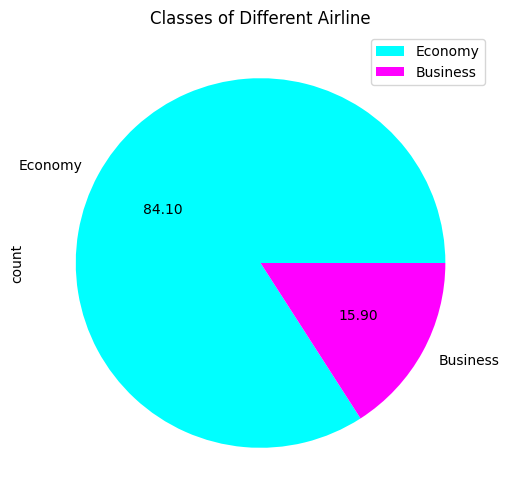

In [ ]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title("Classes of Different Airline")
plt.legend(['Economy','Business'])
plt.show()

In [ ]:
## Price vary with Airline?
df.groupby('airline')['price'].max().sort_values(ascending=False)

,price
airline,
Vistara,123071
Air_India,90970
SpiceJet,34158
GO_FIRST,32803
Indigo,31952
AirAsia,31917




*  As we can see Vistara has Maximum Price range

* Vistara and Air_India have Maximum price as compared to others

*  SpiceJet, GO_FIRST, IndiGo, AirAsia has some what equal price









<ipython-input-101-f77b508d7d6a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['airline'],y=df['price'], palette='hls')


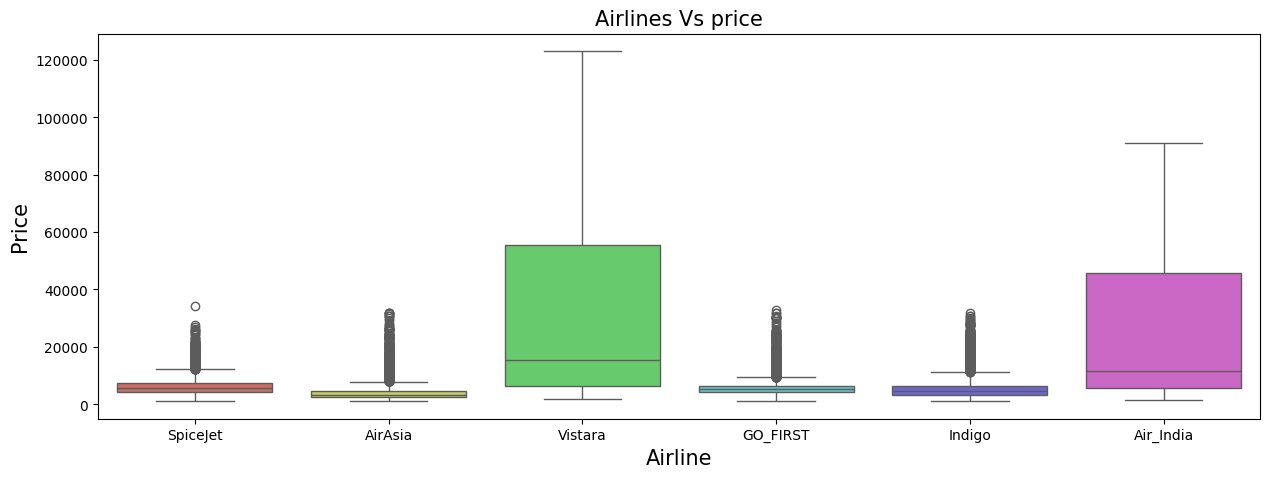

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'], palette='hls')
plt.title("Airlines Vs price",fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [ ]:
## How Does the Ticket Price vary between Economy and Business Class?
df.groupby('class')['price'].max().sort_values(ascending=False)

,price
class,
Business,123071
Economy,42349


In [ ]:
df.groupby('class')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Business,93487.0,52540.081124,12969.314606,12000.0,45185.0,53164.0,60396.0,123071.0
Economy,206666.0,6572.342383,3743.519517,1105.0,4173.0,5772.0,7746.0,42349.0


Ticket Price is maximum for Business Class as compared to Economy Class

<ipython-input-107-bf0cc3ac42ad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class',y='price',data=df, palette='hls')


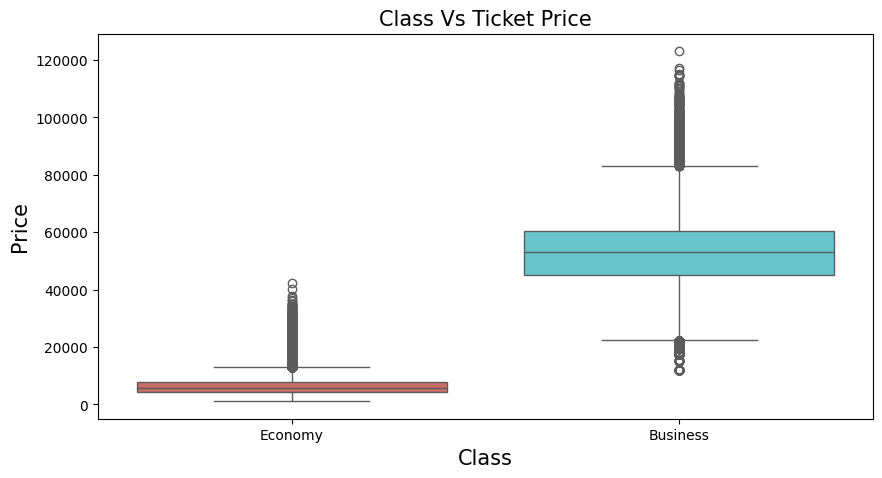

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df, palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [ ]:
#How Does the Ticket Price vary with number of stops of a flight?

df['stops'].unique()



array(['zero', 'one', 'two_or_more'], dtype=object)

In [ ]:
df.groupby('stops')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
stops,,,,,,,,
one,250863.0,22900.992482,23626.066584,1105.0,5136.0,7959.0,48851.0,123071.0
two_or_more,13286.0,14113.450775,17664.332033,1966.0,6432.0,8307.0,13419.0,117307.0
zero,36004.0,9375.938535,10623.008293,1105.0,2586.0,4499.0,8064.0,59573.0


Flights having One Stop has maximum ticket price

<ipython-input-115-40b3bb42fa53>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stops',y='price', data=df, palette='hls')


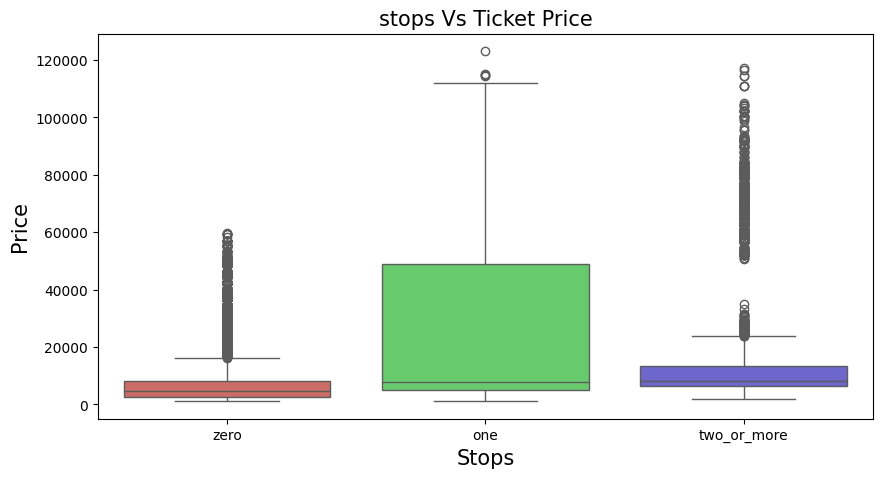

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price', data=df, palette='hls')
plt.title('stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()